# Neural Network Based ElectroMagnetic Solver

by Sethu Hareesh Kolluru

- hareesh@stanford.edu

# Problem 1: Laplace Equation 

Analytical Solution

In [84]:
################################# import libraries ##################################
import numpy as np
import scipy as sp
import pandas as pd
import scipy.linalg
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import time
import sys
import seaborn as sns

In [85]:
################################ Create a 2D Grid ###################################
Nx1 = Nx2 = 21
a=b=1
x1 = np.linspace(0, a, Nx1)
x2 = np.linspace(0, b, Nx2)
X1, X2 = np.meshgrid(x1, x2)

In [86]:
psi=np.zeros((x1.shape[0],x2.shape[0]))
for n in range(1,100,2):
    psi=(1/(np.exp(np.pi)-np.exp(-np.pi)))*(np.outer((np.exp(np.pi*x2)-np.exp(-np.pi*x2)),(np.sin(np.pi*x1))))

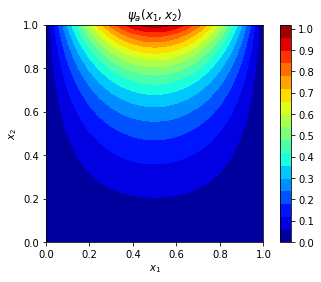

In [87]:
plt.figure(1)
plt.clf()
plt.contourf(x1, x2, psi/(psi.max()),16,cmap="jet")
plt.axis("scaled")
plt.colorbar(ticks=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.title("$\psi_a(x_1,x_2)$")# on %dx%d grid" % (Nx1,Nx2))
plt.savefig("laplace_analytical.png")
plt.show()

Neural Network Based Solution

In [88]:
def calculate_psi(n_x):
  
    psi_boundary=np.zeros((x1.shape[0],x2.shape[0]))
    psi_boundary=np.outer(x2,np.sin(np.pi*x1))
    #psi_boundary[x2.shape[0]-1,:]=x2[x2.shape[0]-1]*np.sin(np.pi*x1)
    
    f_x=np.zeros((x1.shape[0],x2.shape[0]))
    f_x=np.transpose(np.outer(np.multiply(x1,x1-a),np.multiply(x2,x2-b)))
    
    psi_n=psi_boundary+np.multiply(f_x,n_x.reshape(Nx1,Nx2))
 
    plt.figure(5)
    plt.clf()
    plt.contourf(x1, x2, psi_n,16,cmap="jet")
    plt.axis("scaled")
    plt.colorbar(ticks=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    plt.xlabel('$x_{1}$')
    plt.ylabel('$x_{2}$')
    plt.title("$\psi_t(x_1,x_2)$ on %dx%d grid" % (Nx1,Nx2))
    #plt.axhline(0.5, color='white')
    #plt.axvline(0.5, color='white')
    plt.show()
    
    plt.figure(6)
    plt.clf()
    plt.contourf(x1, x2, psi-psi_n,16,cmap="jet")
    plt.axis("scaled")
    plt.colorbar()
    plt.xlabel('$x_{1}$')
    plt.ylabel('$x_{2}$')
    plt.title("$\psi(x_1,x_2)$ on %dx%d grid" % (Nx1,Nx2))
    #plt.axhline(0.5, color='white')
    #plt.axvline(0.5, color='white')
    plt.show()
    
    print("The l2 norm error is : ",np.linalg.norm(psi-psi_n)**2)

In [89]:
def calculate_psi_loop_k(n_x):
    desc_contour=['$\psi_t(x_1,x_2)$  :  H=15,K=8','$\psi_t(x_1,x_2)$  :  H=15,K=16','$\psi_t(x_1,x_2)$  :  H=15,K=24','$\psi_t(x_1,x_2)$  :  H=15,K=32','$\psi_t(x_1,x_2)$  :  H=15,K=40']
    filename_contour=['NN_K_8_H_15.png','NN_K_16_H_15.png','NN_K_24_H_15.png','NN_K_32_H_15.png','NN_K_40_H_15.png']
    desc_delta=['$|\psi_a(x_1,x_2)-\psi_t(x_1,x_2)|$  :   H=15,K=8','$|\psi_a(x_1,x_2)-\psi_t(x_1,x_2)|$  :  H=15,K=16','$|\psi_a(x_1,x_2)-\psi_t(x_1,x_2)|$  :  H=15,K=24','$|\psi_a(x_1,x_2)-\psi_t(x_1,x_2)|$  :  H=15,K=32','$|\psi_a(x_1,x_2)-\psi_t(x_1,x_2)|$  :  H=15,K=40']
    filename_delta=['Delta_H_15_K_8.png','Delta_H_15_K_16.png','Delta_H_15_K_24.png','Delta_H_15_K_32.png','Delta_H_15_K_40.png']
    #desc_error=['$\psi_a(x_1,x_2)-\psi_t(x_1,x_2)$ - H=5,K=16','$\psi_a(x_1,x_2)-\psi_t(x_1,x_2)$ - H=25,K=16','$\psi_a(x_1,x_2)-\psi_t(x_1,x_2)$ - H=25,K=16','$\psi_a(x_1,x_2)-\psi_t(x_1,x_2)$ - H=35,K=16','$\psi_a(x_1,x_2)-\psi_t(x_1,x_2)$ - H=45,K=16']
    #filename_error=['a1.png','a1.png','a1.png','a1.png','a1.png']
    
    psi_n=np.zeros((n_x.shape[0],x1.shape[0],x2.shape[0]))
    error=np.zeros((n_x.shape[0],x1.shape[0],x2.shape[0]))
    data=np.zeros((n_x.shape[0],x1.shape[0]*x2.shape[0]))
    l2_error=np.zeros(n_x.shape[0])
  
    psi_boundary=np.zeros((x1.shape[0],x2.shape[0]))
    psi_boundary=np.outer(x2,np.sin(np.pi*x1))
    
    f_x=np.zeros((x1.shape[0],x2.shape[0]))
    f_x=np.transpose(np.outer(np.multiply(x1,x1-a),np.multiply(x2,x2-b)))
  
    for i in range(n_x.shape[0]):
        psi_n[i]=psi_boundary+np.multiply(f_x,n_x[i].reshape(Nx1,Nx2))
        plot_contour_k(psi_n[i],x1,x2,desc_contour[i],filename_contour[i])
        plot_delta_k(np.absolute(psi-psi_n[i]),x1,x2,desc_delta[i],filename_delta[i])
        error[i]=np.absolute(psi-psi_n[i])
        data[i]=error[i].reshape((x1.shape[0]*x2.shape[0]))
        l2_error[i]=(np.linalg.norm(psi-psi_n[i]))/np.linalg.norm(psi)
    plot_errorbars_k(np.transpose(data),l2_error,"Error Dependance on K","Error_K")
    print(l2_error)
    
# all Plots to be used for error analysis with variation in k
def plot_contour_k(psi,x1,x2,desc,filename):
    plt.figure()
    plt.clf()
    plt.contourf(x1, x2, psi/(psi.max()),16,cmap="jet",label=desc)
    plt.axis("scaled")
    plt.colorbar(ticks=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    plt.xlabel('$x_{1}$')
    plt.ylabel('$x_{2}$')
    plt.title(desc)#"$\psi_t(x_1,x_2)$ on %dx%d grid" % (Nx1,Nx2))
    plt.savefig(filename)
    plt.show()

def plot_delta_k(psi,x1,x2,desc,filename):
    plt.figure()
    plt.clf()
    plt.contourf(x1, x2, psi,16,cmap="jet",label=desc)
    plt.axis("scaled")
    plt.colorbar()#ticks=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    plt.xlabel('$x_{1}$')
    plt.ylabel('$x_{2}$')
    plt.title(desc)#"$\psi_t(x_1,x_2)$ on %dx%d grid" % (Nx1,Nx2))
    plt.savefig(filename)
    plt.show()

def plot_errorbars_k(data,l2_error,desc,filename):
    plt.figure()
    plt.clf()
    ax = plt.subplot()
    plt.boxplot(data,showmeans=False,patch_artist=True,zorder=2)
    plt.xlabel('Training grid resolution, K')
    plt.ylabel('$|\psi_a(x_1,x_2)-\psi_t(x_1,x_2)|$')
    plt.title(desc)#"$\psi_t(x_1,x_2)$ on %dx%d grid" % (Nx1,Nx2))
    plt.ylim(ymin=0,ymax=0.016)#(np.max(l2_error)+0.001))
    ax.yaxis.grid(True)
    ax.set_xticks([1,2,3,4,5])
    ax.set_xticklabels(['8','16','24','30', '40'])
    plt.scatter( [1,2,3,4,5], l2_error, c='C1',zorder=3,label="Relative Error Norm")
    plt.legend()
    plt.savefig(filename)
    plt.show()

In [90]:
def calculate_psi_loop_h(n_x):
    desc_contour=['$\psi_t(x_1,x_2)$  :  H=5,K=16','$\psi_t(x_1,x_2)$  :  H=15,K=16','$\psi_t(x_1,x_2)$  :  H=25,K=16','$\psi_t(x_1,x_2)$  :  H=35,K=16','$\psi_t(x_1,x_2)$  :  H=45,K=16']
    filename_contour=['NN_H_5_K_16.png','NN_H_15_K_16.png','NN_H_25_K_16.png','NN_H_35_K_16.png','NN_H_45_K_16.png']
    desc_delta=['$|\psi_a(x_1,x_2)-\psi_t(x_1,x_2)|$  :  H=5,K=16','$|\psi_a(x_1,x_2)-\psi_t(x_1,x_2)|$  :  H=15,K=16','$|\psi_a(x_1,x_2)-\psi_t(x_1,x_2)|$  :  H=25,K=16','$|\psi_a(x_1,x_2)-\psi_t(x_1,x_2)|$  :  H=35,K=16','$|\psi_a(x_1,x_2)-\psi_t(x_1,x_2)|$  :  H=45,K=16']
    filename_delta=['Delta_H_5_K_16.png','Delta_H_15_K_16.png','Delta_H_25_K_16.png','Delta_H_35_K_16.png','Delta_H_45_K_16.png']
    #desc_error=['$\psi_a(x_1,x_2)-\psi_t(x_1,x_2)$ - H=5,K=16','$\psi_a(x_1,x_2)-\psi_t(x_1,x_2)$ - H=25,K=16','$\psi_a(x_1,x_2)-\psi_t(x_1,x_2)$ - H=25,K=16','$\psi_a(x_1,x_2)-\psi_t(x_1,x_2)$ - H=35,K=16','$\psi_a(x_1,x_2)-\psi_t(x_1,x_2)$ - H=45,K=16']
    #filename_error=['a1.png','a1.png','a1.png','a1.png','a1.png']
    
    psi_n=np.zeros((n_x.shape[0],x1.shape[0],x2.shape[0]))
    error=np.zeros((n_x.shape[0],x1.shape[0],x2.shape[0]))
    data=np.zeros((n_x.shape[0],x1.shape[0]*x2.shape[0]))
    l2_error=np.zeros(n_x.shape[0])
  
    psi_boundary=np.zeros((x1.shape[0],x2.shape[0]))
    psi_boundary=np.outer(x2,np.sin(np.pi*x1))
    
    f_x=np.zeros((x1.shape[0],x2.shape[0]))
    f_x=np.transpose(np.outer(np.multiply(x1,x1-a),np.multiply(x2,x2-b)))
  
    for i in range(n_x.shape[0]):
        psi_n[i]=psi_boundary+np.multiply(f_x,n_x[i].reshape(Nx1,Nx2))
        plot_contour_h(psi_n[i],x1,x2,desc_contour[i],filename_contour[i])
        plot_delta_h(np.absolute(psi-psi_n[i]),x1,x2,desc_delta[i],filename_delta[i])
        error[i]=np.absolute(psi-psi_n[i])
        data[i]=error[i].reshape((x1.shape[0]*x2.shape[0]))
        l2_error[i]=(np.linalg.norm(psi-psi_n[i]))/np.linalg.norm(psi)
    plot_errorbars_h(np.transpose(data),l2_error,"Error Dependance on H","Error_H")
    print(l2_error)
    
# all Plots to be used for error analysis with variation in h
def plot_contour_h(psi,x1,x2,desc,filename):
    plt.figure()
    plt.clf()
    plt.contourf(x1, x2, psi/(psi.max()),16,cmap="jet",label=desc)
    plt.axis("scaled")
    plt.colorbar(ticks=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    plt.xlabel('$x_{1}$')
    plt.ylabel('$x_{2}$')
    plt.title(desc)#"$\psi_t(x_1,x_2)$ on %dx%d grid" % (Nx1,Nx2))
    plt.savefig(filename)
    plt.show()

def plot_delta_h(psi,x1,x2,desc,filename):
    plt.figure()
    plt.clf()
    plt.contourf(x1, x2, psi,16,cmap="jet",label=desc)
    plt.axis("scaled")
    plt.colorbar()#ticks=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    plt.xlabel('$x_{1}$')
    plt.ylabel('$x_{2}$')
    plt.title(desc)#"$\psi_t(x_1,x_2)$ on %dx%d grid" % (Nx1,Nx2))
    plt.savefig(filename)
    plt.show()

def plot_errorbars_h(data,l2_error,desc,filename):
    plt.figure()
    plt.clf()
    ax = plt.subplot()
    plt.boxplot(data,showmeans=False,patch_artist=True,zorder=2)
    plt.xlabel('Number of Hidden Nodes, H')
    plt.ylabel('$|\psi_a(x_1,x_2)-\psi_t(x_1,x_2)|$')
    plt.title(desc)#"$\psi_t(x_1,x_2)$ on %dx%d grid" % (Nx1,Nx2))
    plt.ylim(ymin=0,ymax=0.016)#(np.max(l2_error)+0.001))
    ax.yaxis.grid(True)
    ax.set_xticks([1,2,3,4,5])
    ax.set_xticklabels(['5','15','25','35', '45'])
    plt.scatter( [1,2,3,4,5], l2_error, c='C1',zorder=3,label="Relative Error Norm")
    plt.legend()
    plt.savefig(filename)
    plt.show()
    #sns.factorplot(kind='box',data=data, size=8, aspect=1.5, legend_out=False)

In [91]:
def calculate_psi_loop_grids(n_x):
    desc_contour=['$\psi_t(x_1,x_2)$  :  H=15,K=16, Grid-1','$\psi_t(x_1,x_2)$  :  H=15,K=16, Grid-2','$\psi_t(x_1,x_2)$  :  H=15,K=16, Grid-3','$\psi_t(x_1,x_2)$  :  H=15,K=16, Grid-4']
    filename_contour=['NN_Grid_1.png','NN_Grid_2.png','NN_Grid_3.png','NN_Grid_3.png']
    desc_delta=['$|\psi_a(x_1,x_2)-\psi_t(x_1,x_2)|$  :   H=15,K=16, Grid-1','$|\psi_a(x_1,x_2)-\psi_t(x_1,x_2)|$  :  H=15,K=16, Grid-2','$|\psi_a(x_1,x_2)-\psi_t(x_1,x_2)|$  :  H=15,K=16, Grid-3','$|\psi_a(x_1,x_2)-\psi_t(x_1,x_2)|$  :  H=15,K=16, Grid-4']
    filename_delta=['Delta_Grid_1.png','Delta_Grid_2.png','Delta_Grid_3.png','Delta_Grid_4.png']
    #desc_error=['$\psi_a(x_1,x_2)-\psi_t(x_1,x_2)$ - H=5,K=16','$\psi_a(x_1,x_2)-\psi_t(x_1,x_2)$ - H=25,K=16','$\psi_a(x_1,x_2)-\psi_t(x_1,x_2)$ - H=25,K=16','$\psi_a(x_1,x_2)-\psi_t(x_1,x_2)$ - H=35,K=16','$\psi_a(x_1,x_2)-\psi_t(x_1,x_2)$ - H=45,K=16']
    #filename_error=['a1.png','a1.png','a1.png','a1.png','a1.png']
    
    psi_n=np.zeros((n_x.shape[0],x1.shape[0],x2.shape[0]))
    error=np.zeros((n_x.shape[0],x1.shape[0],x2.shape[0]))
    data=np.zeros((n_x.shape[0],x1.shape[0]*x2.shape[0]))
    l2_error=np.zeros(n_x.shape[0])
  
    psi_boundary=np.zeros((x1.shape[0],x2.shape[0]))
    psi_boundary=np.outer(x2,np.sin(np.pi*x1))
    
    f_x=np.zeros((x1.shape[0],x2.shape[0]))
    f_x=np.transpose(np.outer(np.multiply(x1,x1-a),np.multiply(x2,x2-b)))
  
    for i in range(n_x.shape[0]):
        psi_n[i]=psi_boundary+np.multiply(f_x,n_x[i].reshape(Nx1,Nx2))
        plot_contour_grids(psi_n[i],x1,x2,desc_contour[i],filename_contour[i])
        plot_delta_grids(np.absolute(psi-psi_n[i]),x1,x2,desc_delta[i],filename_delta[i])
        error[i]=np.absolute(psi-psi_n[i])
        data[i]=error[i].reshape((x1.shape[0]*x2.shape[0]))
        l2_error[i]=(np.linalg.norm(psi-psi_n[i]))/np.linalg.norm(psi)
    plot_errorbars_grids(np.transpose(data),l2_error,"Error Dependance on Grid Structure","Error_Grid")
    print(l2_error)
       
# all Plots to be used for error analysis with variation in k
def plot_contour_grids(psi,x1,x2,desc,filename):
    plt.figure()
    plt.clf()
    plt.contourf(x1, x2, psi/(psi.max()),16,cmap="jet",label=desc)
    plt.axis("scaled")
    plt.colorbar(ticks=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    plt.xlabel('$x_{1}$')
    plt.ylabel('$x_{2}$')
    plt.title(desc)#"$\psi_t(x_1,x_2)$ on %dx%d grid" % (Nx1,Nx2))
    plt.savefig(filename)
    plt.show()

def plot_delta_grids(psi,x1,x2,desc,filename):
    plt.figure()
    plt.clf()
    plt.contourf(x1, x2, psi,16,cmap="jet",label=desc)
    plt.axis("scaled")
    plt.colorbar()#ticks=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    plt.xlabel('$x_{1}$')
    plt.ylabel('$x_{2}$')
    plt.title(desc)#"$\psi_t(x_1,x_2)$ on %dx%d grid" % (Nx1,Nx2))
    plt.savefig(filename)
    plt.show()

def plot_errorbars_grids(data,l2_error,desc,filename):
    plt.figure()
    plt.clf()
    ax = plt.subplot()
    plt.boxplot(data,showmeans=False,patch_artist=True,zorder=2)
    plt.xlabel('Training Grid')
    plt.ylabel('$|\psi_a(x_1,x_2)-\psi_t(x_1,x_2)|$')
    plt.title(desc)#"$\psi_t(x_1,x_2)$ on %dx%d grid" % (Nx1,Nx2))
    plt.ylim(ymin=0,ymax=0.0030)#(np.max(l2_error)+0.001))
    ax.yaxis.grid(b=True)#, which='major', color='b', linestyle='-')
    #ax.yaxis.grid(b=True, which='minor', color='r', linestyle='--')
    ax.set_xticks([1,2,3,4])
    ax.set_xticklabels(['Grid-1','Grid-2','Grid-3','Grid-4'])
    plt.scatter( [1,2,3,4], l2_error, c='C1',zorder=3,label="Relative Error Norm")
    plt.legend()
    plt.savefig(filename)
    plt.show()

In [92]:
def calculate_psi_test_epoch(n_x):
    psi_n=np.zeros((n_x.shape[0],x1.shape[0],x2.shape[0]))
    error=np.zeros((n_x.shape[0],x1.shape[0],x2.shape[0]))
    data=np.zeros((n_x.shape[0],x1.shape[0]*x2.shape[0]))
    l2_error=np.zeros(n_x.shape[0])
  
    psi_boundary=np.zeros((x1.shape[0],x2.shape[0]))
    psi_boundary=np.outer(x2,np.sin(np.pi*x1))
    
    f_x=np.zeros((x1.shape[0],x2.shape[0]))
    f_x=np.transpose(np.outer(np.multiply(x1,x1-a),np.multiply(x2,x2-b)))
  
    for i in range(n_x.shape[0]):
        psi_n[i]=psi_boundary+np.multiply(f_x,n_x[i].reshape(Nx1,Nx2))
        #plot_contour_grids(psi_n[i],x1,x2,desc_contour[i],filename_contour[i])
        #plot_delta_grids(np.absolute(psi-psi_n[i]),x1,x2,desc_delta[i],filename_delta[i])
        error[i]=np.absolute(psi-psi_n[i])
        data[i]=error[i].reshape((x1.shape[0]*x2.shape[0]))
        l2_error[i]=(np.linalg.norm(psi-psi_n[i]))/np.linalg.norm(psi)
    #plot_errorbars_grids(np.transpose(data),l2_error,"Error Dependance on Grid Structure","Error_Grid")
    return l2_error

In [93]:
def calculate_psi_train_epoch(n_x):
    Nx1 = Nx2 = 16
    a=b=1
    x1 = np.linspace(0, a, Nx1)
    x2 = np.linspace(0, b, Nx2)
    X1, X2 = np.meshgrid(x1, x2)
    
    psi=np.zeros((x1.shape[0],x2.shape[0]))
    for n in range(1,100,2):
        psi=(1/(np.exp(np.pi)-np.exp(-np.pi)))*(np.outer((np.exp(np.pi*x2)-np.exp(-np.pi*x2)),(np.sin(np.pi*x1))))
    
    psi_n=np.zeros((n_x.shape[0],x1.shape[0],x2.shape[0]))
    error=np.zeros((n_x.shape[0],x1.shape[0],x2.shape[0]))
    data=np.zeros((n_x.shape[0],x1.shape[0]*x2.shape[0]))
    l2_error=np.zeros(n_x.shape[0])
  
    psi_boundary=np.zeros((x1.shape[0],x2.shape[0]))
    psi_boundary=np.outer(x2,np.sin(np.pi*x1))
    
    f_x=np.zeros((x1.shape[0],x2.shape[0]))
    f_x=np.transpose(np.outer(np.multiply(x1,x1-a),np.multiply(x2,x2-b)))
  
    for i in range(n_x.shape[0]):
        psi_n[i]=psi_boundary+np.multiply(f_x,n_x[i].reshape(Nx1,Nx2))
        #plot_contour_grids(psi_n[i],x1,x2,desc_contour[i],filename_contour[i])
        #plot_delta_grids(np.absolute(psi-psi_n[i]),x1,x2,desc_delta[i],filename_delta[i])
        error[i]=np.absolute(psi-psi_n[i])
        data[i]=error[i].reshape((x1.shape[0]*x2.shape[0]))
        l2_error[i]=(np.linalg.norm(psi-psi_n[i]))/np.linalg.norm(psi)
    #plot_errorbars_grids(np.transpose(data),l2_error,"Error Dependance on Grid Structure","Error_Grid")
    return l2_error

In [94]:
# Implementation of a simple MLP network with one hidden layer.
import tensorflow as tf

RANDOM_SEED = 42
tf.set_random_seed(RANDOM_SEED)

def init_weights(shape):
    """ Weight initialization """
    weights = tf.random_normal(shape, stddev=0.1)
    return tf.Variable(weights)

def forwardprop(X, w_1, b_1, w_2):
    h    = tf.nn.sigmoid(tf.matmul(w_1, X)+b_1)  # The \sigma function
    yhat = tf.matmul(w_2,h)
    return yhat

def forwardprop_nx_prime(X, w_1, b_1, w_2):
    h    = tf.multiply(tf.nn.sigmoid(tf.matmul(w_1, X)+b_1),(1-tf.nn.sigmoid(tf.matmul(w_1, X)+b_1)) ) 
    w_2_prime_x1=tf.multiply(w_2,tf.transpose(w_1[:,0]))
    nx_prime_x1 = tf.matmul(w_2_prime_x1,h)
    w_2_prime_x2=tf.multiply(w_2,tf.transpose(w_1[:,1]))
    nx_prime_x2 = tf.matmul(w_2_prime_x2,h)
    return nx_prime_x1,nx_prime_x2

def forwardprop_nx_double_prime(X, w_1, b_1, w_2):
    h    = tf.multiply(tf.nn.sigmoid(tf.matmul(w_1, X)+b_1),(1-tf.nn.sigmoid(tf.matmul(w_1, X)+b_1)) )
    h    = tf.multiply(h,(1-2*tf.nn.sigmoid(tf.matmul(w_1, X)+b_1)) )
    w_1_pow2=tf.multiply(w_1,w_1)
    w_2_double_prime_x1=tf.multiply(w_2,tf.transpose(w_1_pow2[:,0]))
    nx_double_prime_x1 = tf.matmul(w_2_double_prime_x1,h)
    w_2_double_prime_x2=tf.multiply(w_2,tf.transpose(w_1_pow2[:,1]))
    nx_double_prime_x2 = tf.matmul(w_2_double_prime_x2,h)
    return nx_double_prime_x1,nx_double_prime_x2

def calc_cost(X, w_1, b_1, w_2):
    x_1=X[0]
    x_2=X[1]
    yhat_cost=0
    pi=tf.constant(np.pi)
    
    n=forwardprop(X, w_1, b_1, w_2)
    nx_prime_x1,nx_prime_x2=forwardprop_nx_prime(X, w_1, b_1, w_2)
    nx_double_prime_x1,nx_double_prime_x2=forwardprop_nx_double_prime(X, w_1, b_1, w_2)

    yhat_cost_x1= -tf.pow(pi,2)*x_2*tf.sin(pi*x_1)+x_2*(x_2-1)*(nx_double_prime_x1*(x_1**2-x_1)+nx_prime_x1*(4*x_1-2)+2*n)
    yhat_cost_x2= x_1*(x_1-1)*(nx_double_prime_x2*(x_2**2-x_2)+nx_prime_x2*(4*x_2-2)+2*n)
    yhat_cost=yhat_cost_x1+yhat_cost_x2
    
    return yhat_cost

def get_train_data(train_grid_size):
    Nx1 = Nx2 = train_grid_size
    a=b=1
    x1 = np.linspace(0, a, Nx1)
    x2 = np.linspace(0, b, Nx2)
    X1, X2 = np.meshgrid(x1, x2)
    data=np.vstack((X1.reshape(1,x1.shape[0]*x2.shape[0]),X2.reshape(1,x1.shape[0]*x2.shape[0])))
    target=np.zeros((x1.shape[0]*x2.shape[0],1))
    return data,target

def get_test_data(test_grid_size):
    Nx1 = Nx2 = test_grid_size
    a=b=1
    x1 = np.linspace(0, a, Nx1)
    x2 = np.linspace(0, b, Nx2)
    X1, X2 = np.meshgrid(x1, x2)
    data=np.vstack((X1.reshape(1,x1.shape[0]*x2.shape[0]),X2.reshape(1,x1.shape[0]*x2.shape[0])))
    target=np.zeros((x1.shape[0]*x2.shape[0],1))
    return data,target

In [95]:
#used to generate - Grid 2
def get_train_data_grid_experiment_1():
    x1=np.zeros(16,)
    x2=np.zeros(16,)
    xA=np.zeros(16,)
    xB=np.zeros(16,)
    xA[0]=0
    xA[15]=1
    for i in range(1,8):
        xA[i]=xA[i-1]+i*(0.5/28)
    for i in range(14,8,-1):
        xA[i]=xA[i+1]-(16-i)*(0.5/28)
    xB=xA
    X1, X2 = np.meshgrid(xA, xB)
    data=np.vstack((X1.reshape(1,x1.shape[0]*x2.shape[0]),X2.reshape(1,x1.shape[0]*x2.shape[0])))
    target=np.zeros((x1.shape[0]*x2.shape[0],1))
    return data,target
    #plt.scatter(X1,X2,marker='o',c='b',s=20)
    #plt.xlim(0,1)
    #plt.ylim(0,1)
    #plt.show()

#used to generate - Grid 3
def get_train_data_grid_experiment_2():
    x1=np.zeros(16,)
    x2=np.zeros(16,)
    xC=np.zeros(16,)
    xD=np.zeros(16,)
    xC[0]=0
    xC[15]=1
    for i in range(1,8):
        xC[i]=xC[i-1]+(8-i)*(0.5/28)
    for i in range(14,8,-1):
        xC[i]=xC[i+1]-(i+1-8)*(0.5/28)
    xD=xC
    X1, X2 = np.meshgrid(xC, xD)
    data=np.vstack((X1.reshape(1,x1.shape[0]*x2.shape[0]),X2.reshape(1,x1.shape[0]*x2.shape[0])))
    target=np.zeros((x1.shape[0]*x2.shape[0],1))
    return data,target
    #plt.scatter(X1,X2,marker='o',c='b',s=20)
    #plt.xlim(0,1)
    #plt.ylim(0,1)
    #plt.show()
    
#used to generate - Grid 4    
def get_train_data_grid_experiment_3(): 
    x1=np.zeros(16,)
    x2=np.zeros(16,)
    XE=np.zeros((16,16))
    XF=np.zeros((16,16))
    for i in range(16):
        for j in range(16):
            XE[i,j]=np.random.uniform(0,1)
            XF[i,j]=np.random.uniform(0,1)
    #X1, X2 = np.meshgrid(xC, xD)
    X1=XE
    X2=XF
    data=np.vstack((X1.reshape(1,x1.shape[0]*x2.shape[0]),X2.reshape(1,x1.shape[0]*x2.shape[0])))
    target=np.zeros((x1.shape[0]*x2.shape[0],1))
    return data,target

In [96]:
train_grid_size=16 # default
train_grid_size_array=[8,16,24,32,40]
train_X, train_y= get_train_data(train_grid_size)
    
test_grid_size=21
test_X, test_y= get_test_data(test_grid_size)
    
h_size=15 # default
h_size_array=[5,15,25,35,45]

n_x=np.zeros(test_X.shape[1])

#n_x_h=np.zeros((5,test_X.shape[1]))
#n_x_k=np.zeros((5,test_X.shape[1]))
#n_x_grids=np.zeros((4,test_X.shape[1]))

count=0
    
#for h_size in h_size_array:
#for train_grid_size in train_grid_size_array:
for i in range(1):    
    
    #train_X, train_y= get_train_data(train_grid_size)
    #train_X, train_y= get_train_data_grid_experiment_3()
    
    #print("Number of Hidden Nodes=",h_size)
    #print("Training Grid Resolution=",train_grid_size)
    
    
    # Layer's sizes
    x_size = train_X.shape[0]   # Number of input nodes: 2 features
    #h_size = 36#256             # Number of hidden nodes
    y_size = train_y.shape[1]   # Number of outcomes: 1

    # Symbols
    X = tf.placeholder("float", shape=[x_size,None])
    y = tf.placeholder("float", shape=[y_size,None])

    # Weight initializations
    w_1 = init_weights((h_size, x_size))
    w_2 = init_weights((y_size, h_size))
    b_1= init_weights((h_size, 1))

    # Forward propagation
    yhat    = forwardprop(X, w_1, b_1, w_2)

    # Cost Function, which is the PDE we are trying to solve
    yhat_cost=calc_cost(X, w_1, b_1, w_2)
    
    beta=0.0001
    regularizer_1 = tf.nn.l2_loss(w_1)
    regularizer_2 = tf.nn.l2_loss(w_2)
    
    global_step = tf.Variable(0, trainable=False)
    starter_learning_rate = 0.1
    learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step, 50000, 0.7, staircase=True)

    # Backward propagation
    #cost    = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=yhat))
    cost = tf.reduce_mean(tf.losses.mean_squared_error(predictions=yhat_cost,labels=y))#+ beta * regularizer_1+beta * regularizer_1
    updates = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost,global_step=global_step)
    
    epoch_range=500
    train_accuracy=np.zeros(epoch_range)
    test_accuracy=np.zeros(epoch_range)
    n_x_train_epoch=np.zeros((epoch_range,train_X.shape[1]))
    n_x_test_epoch=np.zeros((epoch_range,test_X.shape[1]))
    
    # Run SGD
    with tf.Session() as sess:
        init = tf.global_variables_initializer()
        sess.run(init) 
        for epoch in range(epoch_range):

            for i in range(train_X.shape[1]):
                sess.run(updates,feed_dict={X:train_X[:,i:i+1],y:train_y[i:i+1]})

            train_accuracy[epoch]=0
            for i in range(train_X.shape[1]):
                train_accuracy[epoch] += sess.run(cost,feed_dict={X:train_X[:,i:i+1],y:train_y[i:i+1]})
            print("Epoch = %d, train accuracy = %.2f%%" % (epoch + 1, train_accuracy[epoch]))
            
            for i in range(train_X.shape[1]):
                n_x_train_epoch[epoch][i]=sess.run(yhat,feed_dict={X:train_X[:,i:i+1]})
            
            test_accuracy[epoch]=0
            for i in range(test_X.shape[1]):
                test_accuracy[epoch] += sess.run(cost,feed_dict={X:test_X[:,i:i+1],y:test_y[i:i+1]})
            print("Epoch = %d, test accuracy = %.2f%%" % (epoch + 1, test_accuracy[epoch]))
            
            for i in range(test_X.shape[1]):
                n_x_test_epoch[epoch][i]=sess.run(yhat,feed_dict={X:test_X[:,i:i+1]})

        #testing
        for i in range(test_X.shape[1]):
            #n_x_h[count][i]=sess.run(yhat,feed_dict={X:test_X[:,i:i+1]})
            #n_x_k[count][i]=sess.run(yhat,feed_dict={X:test_X[:,i:i+1]})
            #n_x_grids[3][i]=sess.run(yhat,feed_dict={X:test_X[:,i:i+1]})
            n_x[i]=sess.run(yhat,feed_dict={X:test_X[:,i:i+1]})
        
    #count+=1
#calculate_psi(n_x)
#calculate_psi_loop_h(n_x_h)
#calculate_psi_loop_k(n_x_k)

Epoch = 1, train accuracy = 10916.19%
Epoch = 1, test accuracy = 19198.39%
Epoch = 2, train accuracy = 3022.28%
Epoch = 2, test accuracy = 5272.36%
Epoch = 3, train accuracy = 1862.46%
Epoch = 3, test accuracy = 3233.42%
Epoch = 4, train accuracy = 1369.57%
Epoch = 4, test accuracy = 2369.71%
Epoch = 5, train accuracy = 1072.50%
Epoch = 5, test accuracy = 1849.89%
Epoch = 6, train accuracy = 883.69%
Epoch = 6, test accuracy = 1519.83%
Epoch = 7, train accuracy = 759.01%
Epoch = 7, test accuracy = 1302.06%
Epoch = 8, train accuracy = 672.63%
Epoch = 8, test accuracy = 1151.31%
Epoch = 9, train accuracy = 609.64%
Epoch = 9, test accuracy = 1041.48%
Epoch = 10, train accuracy = 561.46%
Epoch = 10, test accuracy = 957.53%
Epoch = 11, train accuracy = 523.05%
Epoch = 11, test accuracy = 890.65%
Epoch = 12, train accuracy = 491.39%
Epoch = 12, test accuracy = 835.58%
Epoch = 13, train accuracy = 464.65%
Epoch = 13, test accuracy = 789.11%
Epoch = 14, train accuracy = 441.70%
Epoch = 14, test

Epoch = 115, train accuracy = 16.67%
Epoch = 115, test accuracy = 28.84%
Epoch = 116, train accuracy = 16.61%
Epoch = 116, test accuracy = 28.75%
Epoch = 117, train accuracy = 16.56%
Epoch = 117, test accuracy = 28.66%
Epoch = 118, train accuracy = 16.51%
Epoch = 118, test accuracy = 28.58%
Epoch = 119, train accuracy = 16.46%
Epoch = 119, test accuracy = 28.50%
Epoch = 120, train accuracy = 16.42%
Epoch = 120, test accuracy = 28.43%
Epoch = 121, train accuracy = 16.38%
Epoch = 121, test accuracy = 28.36%
Epoch = 122, train accuracy = 16.33%
Epoch = 122, test accuracy = 28.29%
Epoch = 123, train accuracy = 16.29%
Epoch = 123, test accuracy = 28.22%
Epoch = 124, train accuracy = 16.25%
Epoch = 124, test accuracy = 28.15%
Epoch = 125, train accuracy = 16.21%
Epoch = 125, test accuracy = 28.09%
Epoch = 126, train accuracy = 16.17%
Epoch = 126, test accuracy = 28.02%
Epoch = 127, train accuracy = 16.13%
Epoch = 127, test accuracy = 27.94%
Epoch = 128, train accuracy = 16.08%
Epoch = 128, t

Epoch = 229, train accuracy = 5.23%
Epoch = 229, test accuracy = 9.05%
Epoch = 230, train accuracy = 5.20%
Epoch = 230, test accuracy = 9.00%
Epoch = 231, train accuracy = 5.17%
Epoch = 231, test accuracy = 8.94%
Epoch = 232, train accuracy = 5.14%
Epoch = 232, test accuracy = 8.89%
Epoch = 233, train accuracy = 5.11%
Epoch = 233, test accuracy = 8.84%
Epoch = 234, train accuracy = 5.08%
Epoch = 234, test accuracy = 8.79%
Epoch = 235, train accuracy = 5.06%
Epoch = 235, test accuracy = 8.74%
Epoch = 236, train accuracy = 5.03%
Epoch = 236, test accuracy = 8.69%
Epoch = 237, train accuracy = 5.00%
Epoch = 237, test accuracy = 8.64%
Epoch = 238, train accuracy = 4.97%
Epoch = 238, test accuracy = 8.59%
Epoch = 239, train accuracy = 4.94%
Epoch = 239, test accuracy = 8.54%
Epoch = 240, train accuracy = 4.92%
Epoch = 240, test accuracy = 8.50%
Epoch = 241, train accuracy = 4.89%
Epoch = 241, test accuracy = 8.45%
Epoch = 242, train accuracy = 4.87%
Epoch = 242, test accuracy = 8.40%
Epoch 

Epoch = 345, train accuracy = 2.77%
Epoch = 345, test accuracy = 4.73%
Epoch = 346, train accuracy = 2.75%
Epoch = 346, test accuracy = 4.71%
Epoch = 347, train accuracy = 2.74%
Epoch = 347, test accuracy = 4.68%
Epoch = 348, train accuracy = 2.72%
Epoch = 348, test accuracy = 4.65%
Epoch = 349, train accuracy = 2.71%
Epoch = 349, test accuracy = 4.63%
Epoch = 350, train accuracy = 2.69%
Epoch = 350, test accuracy = 4.60%
Epoch = 351, train accuracy = 2.68%
Epoch = 351, test accuracy = 4.58%
Epoch = 352, train accuracy = 2.66%
Epoch = 352, test accuracy = 4.55%
Epoch = 353, train accuracy = 2.65%
Epoch = 353, test accuracy = 4.53%
Epoch = 354, train accuracy = 2.64%
Epoch = 354, test accuracy = 4.50%
Epoch = 355, train accuracy = 2.62%
Epoch = 355, test accuracy = 4.48%
Epoch = 356, train accuracy = 2.61%
Epoch = 356, test accuracy = 4.45%
Epoch = 357, train accuracy = 2.59%
Epoch = 357, test accuracy = 4.43%
Epoch = 358, train accuracy = 2.58%
Epoch = 358, test accuracy = 4.40%
Epoch 

Epoch = 461, train accuracy = 1.53%
Epoch = 461, test accuracy = 2.60%
Epoch = 462, train accuracy = 1.53%
Epoch = 462, test accuracy = 2.59%
Epoch = 463, train accuracy = 1.53%
Epoch = 463, test accuracy = 2.59%
Epoch = 464, train accuracy = 1.52%
Epoch = 464, test accuracy = 2.58%
Epoch = 465, train accuracy = 1.52%
Epoch = 465, test accuracy = 2.57%
Epoch = 466, train accuracy = 1.52%
Epoch = 466, test accuracy = 2.57%
Epoch = 467, train accuracy = 1.51%
Epoch = 467, test accuracy = 2.56%
Epoch = 468, train accuracy = 1.51%
Epoch = 468, test accuracy = 2.56%
Epoch = 469, train accuracy = 1.51%
Epoch = 469, test accuracy = 2.55%
Epoch = 470, train accuracy = 1.50%
Epoch = 470, test accuracy = 2.55%
Epoch = 471, train accuracy = 1.50%
Epoch = 471, test accuracy = 2.54%
Epoch = 472, train accuracy = 1.50%
Epoch = 472, test accuracy = 2.53%
Epoch = 473, train accuracy = 1.49%
Epoch = 473, test accuracy = 2.53%
Epoch = 474, train accuracy = 1.49%
Epoch = 474, test accuracy = 2.52%
Epoch 

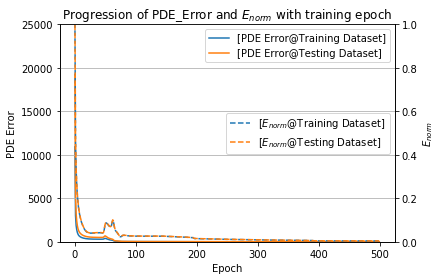

In [98]:
l2_test_error_epoch=calculate_psi_test_epoch(n_x_test_epoch)
l2_train_error_epoch=calculate_psi_train_epoch(n_x_train_epoch)

plt.clf()
ax = plt.subplot()
epoch=np.arange(0,epoch_range)
ax.plot(epoch,train_accuracy[epoch],label="[PDE Error@Training Dataset]")
ax.plot(epoch,test_accuracy[epoch],label="[PDE Error@Testing Dataset]")
plt.ylabel('PDE Error')
plt.xlabel('Epoch')
plt.ylim(ymin=0,ymax=(25000))
plt.legend()
ax2 = ax.twinx()
ax2.plot(epoch,l2_train_error_epoch[epoch],'--',label="[$E_{norm}$@Training Dataset]")
ax2.plot(epoch,l2_test_error_epoch[epoch],'--',label="[$E_{norm}$@Testing Dataset]")
plt.xlabel('Epoch')
plt.ylabel('$E_{norm}$')
plt.title("Progression of PDE_Error and $E_{norm}$ with training epoch")
ax2.yaxis.grid(b=True)
plt.legend(loc="center right")
plt.ylim(ymin=0,ymax=(1))
plt.savefig("Convergence_Laplace_100Epoch.png")
plt.show()

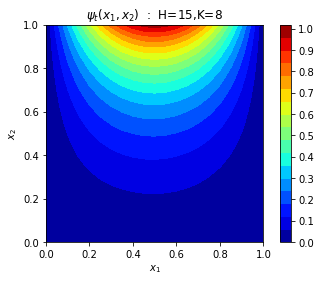

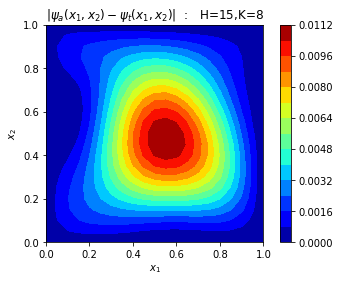

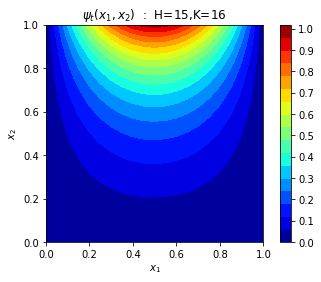

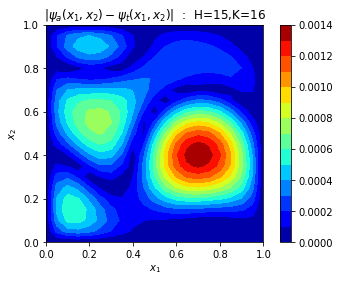

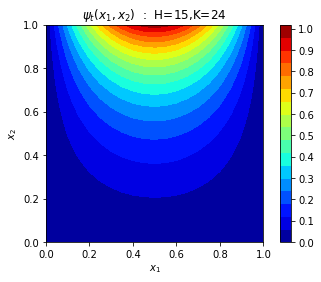

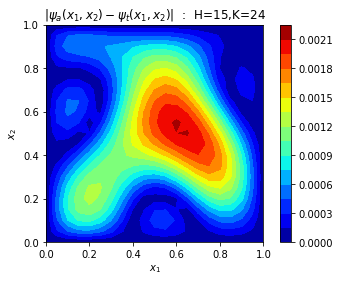

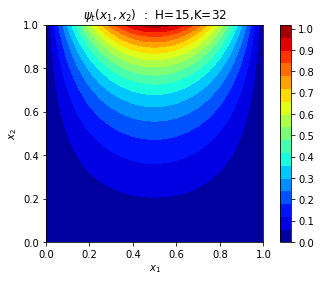

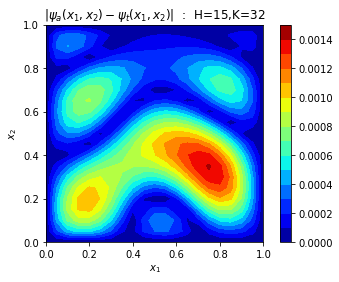

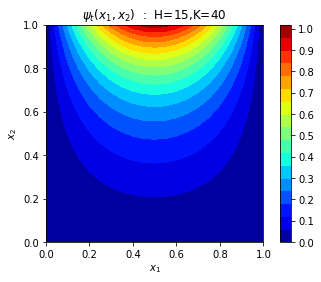

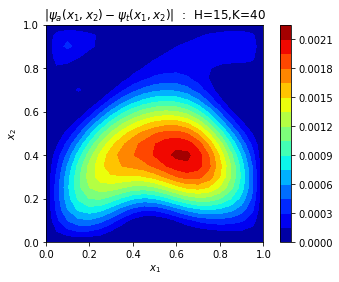

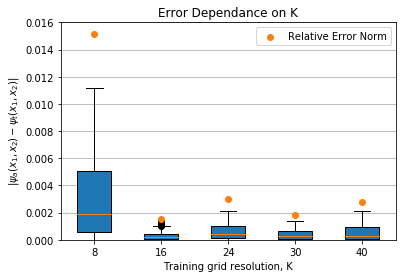

[ 0.01516827  0.00154223  0.00298612  0.00184698  0.00279963]


In [273]:
#np.save('n_x_grids_4.npy', n_x_grids)
n_x_k_saved=np.load('n_x_k_2.npy')
calculate_psi_loop_k(n_x_k_saved)

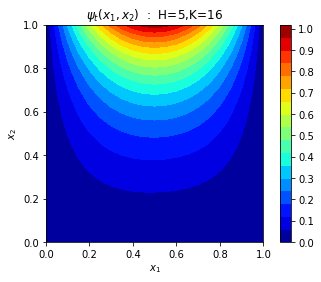

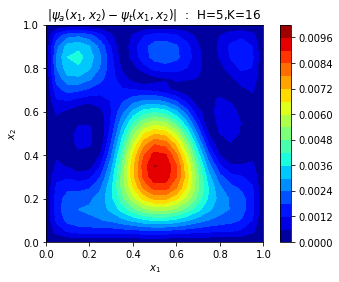

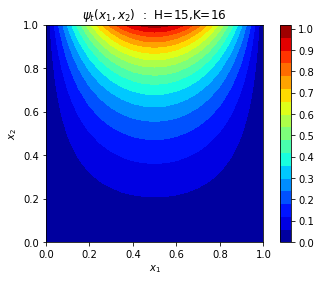

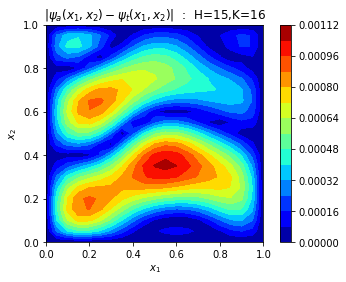

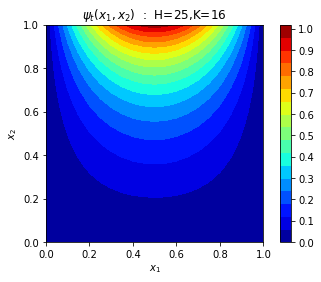

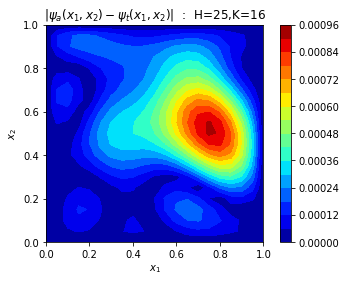

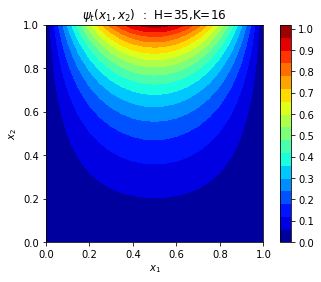

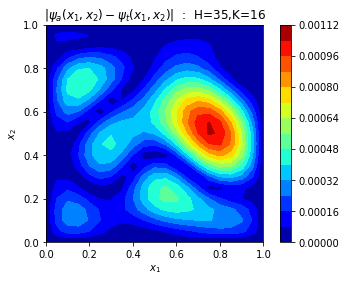

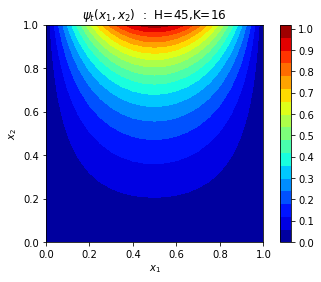

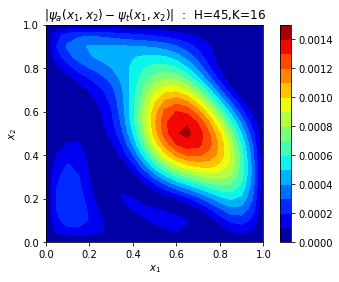

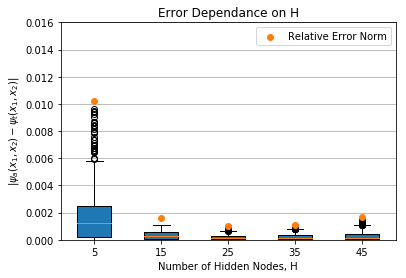

[ 0.01019807  0.0016094   0.00099403  0.0011012   0.00164295]


In [281]:
#np.save('n_x_h_2.npy', n_x_h) 
n_x_h_saved=np.load('n_x_h_2.npy')
calculate_psi_loop_h(n_x_h_saved)

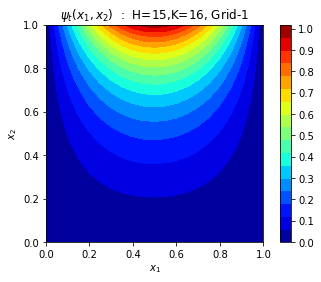

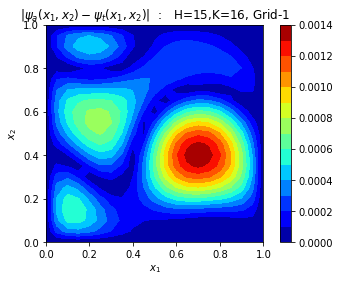

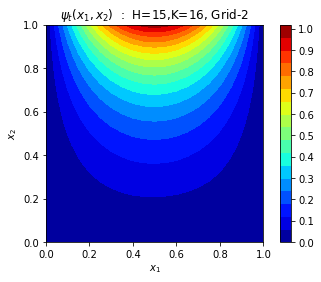

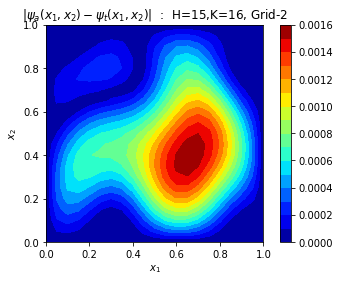

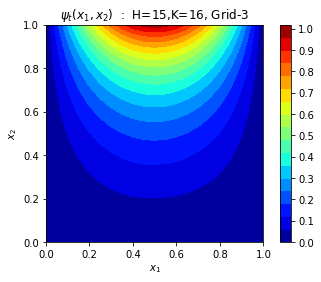

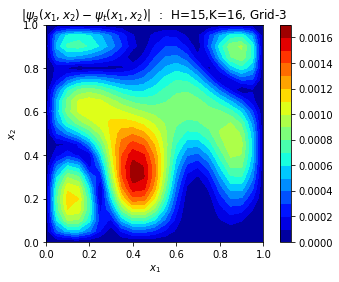

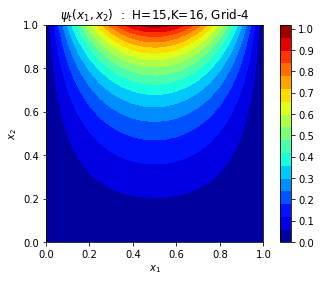

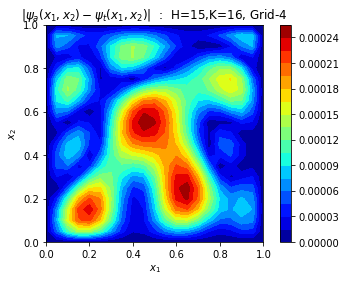

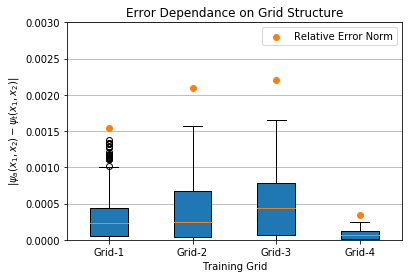

[ 0.00154223  0.00209726  0.00219818  0.00034788]


In [275]:
#np.save('n_x_grids_5.npy', n_x_grids) 
n_x_grids_saved=np.load('n_x_grids_4.npy')
calculate_psi_loop_grids(n_x_grids_saved)

That's it!'